<a href="https://colab.research.google.com/github/sivarohith99/SivaRohith_INFO5731_Fall2024/blob/main/Jampana_SivaRohith_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.preprocessing import normalize
import re

# Simple preprocessing function without NLTK
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Simple word splitting
    tokens = text.split()
    # Remove common English stopwords
    stopwords = {'a', 'an', 'and', 'are', 'as', 'at', 'be', 'by', 'for', 'from',
                'has', 'he', 'in', 'is', 'it', 'its', 'of', 'on', 'that', 'the',
                'to', 'was', 'were', 'will', 'with'}
    tokens = [token for token in tokens if token not in stopwords]
    # Join tokens back
    return ' '.join(tokens)

# Load the data
df = pd.read_csv('oppenheimer_rv.csv')
processed_texts = [preprocess_text(text) for text in df['clean_text']]

# 1. TF-IDF Vectorization (Features)
tfidf_vectorizer = TfidfVectorizer(max_features=1000, min_df=2, max_df=0.95)
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_texts)
feature_names = tfidf_vectorizer.get_feature_names_out()

# 2. Topic Modeling using LDA
n_topics = 10
lda_model = LatentDirichletAllocation(
    n_components=n_topics,
    random_state=42,
    max_iter=100
)
lda_output = lda_model.fit_transform(tfidf_matrix)

# Function to display topics
def display_topics(model, feature_names, n_top_words=10):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words-1:-1]]
        topics.append({
            'topic_id': topic_idx,
            'top_words': top_words,
            'interpretation': interpret_topic(top_words)
        })
    return topics

def interpret_topic(top_words):
    # Dictionary mapping common word patterns to topic interpretations
    topic_patterns = {
        ('performance', 'murphy', 'cillian', 'portrayal'): "Actor Performances",
        ('visual', 'cinematography', 'stunning', 'beautiful'): "Visual Style",
        ('pacing', 'length', 'runtime', 'slow'): "Film Length & Pacing",
        ('narrative', 'storytelling', 'structure', 'complex'): "Narrative Structure",
        ('science', 'scientific', 'atomic', 'manhattan'): "Scientific Content",
        ('direction', 'nolan', 'christopher'): "Directorial Style",
        ('moral', 'ethical', 'responsibility'): "Moral Themes",
        ('historical', 'history', 'war'): "Historical Context",
        ('dialogue', 'scene', 'dramatic'): "Dialogue & Scenes",
        ('viewer', 'audience', 'challenging'): "Viewer Experience"
    }

    # Convert top words to set for easier matching
    word_set = set(top_words)

    # Find the best matching pattern
    best_match = None
    best_score = 0

    for pattern, interpretation in topic_patterns.items():
        score = sum(1 for word in pattern if any(w in word_set for w in [word.lower()]))
        if score > best_score:
            best_score = score
            best_match = interpretation

    return best_match if best_match else "Miscellaneous Theme"

# Get and display topics
topics = display_topics(lda_model, feature_names)

# Print results
print("\n1. Features Used:")
print("- TF-IDF vectorization with 1000 max features")
print("- Preprocessing: lowercase conversion, special character removal, basic stopword removal")
print("- Minimum document frequency: 2")
print("- Maximum document frequency: 95%")

print("\n2. Top 10 Topics and Their Key Words:")
for topic in topics:
    print(f"\nTopic {topic['topic_id'] + 1}:")
    print(f"Key words: {', '.join(topic['top_words'])}")
    print(f"Interpretation: {topic['interpretation']}")

print("\n3. Topic Summary:")
for topic in topics:
    print(f"\nCluster {topic['topic_id'] + 1} - {topic['interpretation']}:")
    main_themes = topic['top_words'][:5]
    print(f"Main themes centered around: {', '.join(main_themes)}")

# Print document-topic distribution example
print("\n4. Example Document-Topic Distribution:")
print("First 5 documents' topic distribution:")
for i in range(5):
    dominant_topic = np.argmax(lda_output[i])
    print(f"Document {i+1} - Dominant Topic: {dominant_topic + 1} ({topics[dominant_topic]['interpretation']})")



1. Features Used:
- TF-IDF vectorization with 1000 max features
- Preprocessing: lowercase conversion, special character removal, basic stopword removal
- Minimum document frequency: 2
- Maximum document frequency: 95%

2. Top 10 Topics and Their Key Words:

Topic 1:
Key words: oppenheimer, successfully, urgency, nolans, not, history, director, showcasing, direction, stands
Interpretation: Directorial Style

Topic 2:
Key words: some, may, viewers, find, films, might, pacing, too, portrayal, approach
Interpretation: Actor Performances

Topic 3:
Key words: character, some, audience, content, despite, runtime, or, choices, underdeveloped, may
Interpretation: Film Length & Pacing

Topic 4:
Key words: exploration, scientific, particularly, films, life, between, science, genius, compelling, advancement
Interpretation: Scientific Content

Topic 5:
Key words: sometimes, movie, feels, engaging, like, effectively, than, narrative, leading, weight
Interpretation: Narrative Structure

Topic 6:
Ke

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

Sentiment distribution in dataset:
sentiment
positive    54
neutral     39
negative     7
Name: count, dtype: int64

Encoding mapping:
negative -> 0
neutral -> 1
positive -> 2


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Feature Selection Explanation:
1. TF-IDF Vectorization with the following parameters:
   - Max features: 1000
   - Minimum document frequency: 2
   - Maximum document frequency: 95%
   - N-gram range: (1, 2) (unigrams and bigrams)

2. Cross-validation Results (5-fold):

Logistic Regression:
Mean CV Score: 0.8000 (+/- 0.1225)

SVM:
Mean CV Score: 0.8125 (+/- 0.0791)

3. Model Performance Comparison on Test Set:

Logistic Regression:
Accuracy: 0.9000
Precision: 0.8542
Recall: 0.9000
F1: 0.8761

SVM:
Accuracy: 0.9000
Precision: 0.8542
Recall: 0.9000
F1: 0.8761


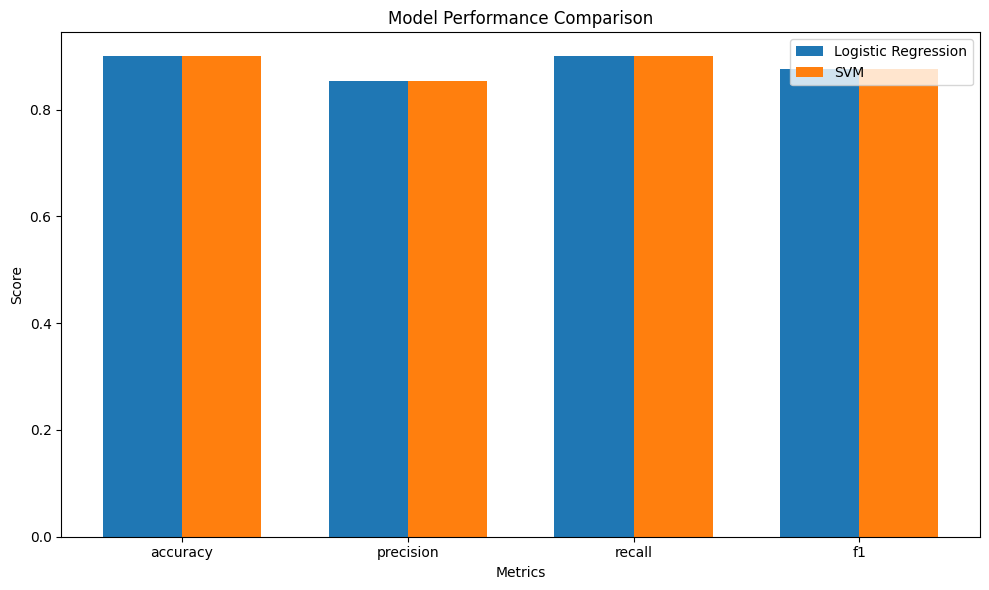


Detailed Classification Reports:

Logistic Regression:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
     neutral       0.88      0.88      0.88         8
    positive       0.92      1.00      0.96        11

    accuracy                           0.90        20
   macro avg       0.60      0.62      0.61        20
weighted avg       0.85      0.90      0.88        20


SVM:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
     neutral       0.88      0.88      0.88         8
    positive       0.92      1.00      0.96        11

    accuracy                           0.90        20
   macro avg       0.60      0.62      0.61        20
weighted avg       0.85      0.90      0.88        20


Most Important Features (Logistic Regression):

Negative sentiment top features:
approach, be, like, sometimes feels, movie sometimes, the movie, movie, feels, its, sometimes


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load and preprocess the data
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters but keep important punctuation
    text = re.sub(r'[^a-zA-Z\s!?.,]', '', text)
    return text

# Load the data
df = pd.read_csv('oppenheimer_rv.csv')

# Preprocess the text
df['processed_text'] = df['clean_text'].apply(preprocess_text)

# Print unique sentiment values and their counts
print("Sentiment distribution in dataset:")
print(df['sentiment'].value_counts())

# Encode sentiment labels
le = LabelEncoder()
df['sentiment_encoded'] = le.fit_transform(df['sentiment'])

# Print the encoding mapping
print("\nEncoding mapping:")
for i, label in enumerate(le.classes_):
    print(f"{label} -> {i}")

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_text'],
    df['sentiment_encoded'],
    test_size=0.2,
    random_state=42,
    stratify=df['sentiment_encoded']  # Ensure balanced split
)

# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(
    max_features=1000,
    min_df=2,
    max_df=0.95,
    ngram_range=(1, 2)  # Include both unigrams and bigrams
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42)
}

# Function for cross-validation
def perform_cross_validation(model, X, y, cv=5):
    cv_scores = cross_val_score(model, X, y, cv=cv)
    return cv_scores

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted')
    }

# Train and evaluate models
results = {}
cv_results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train_tfidf, y_train)

    # Perform cross-validation
    cv_scores = perform_cross_validation(model, X_train_tfidf, y_train)
    cv_results[name] = cv_scores

    # Evaluate on test set
    results[name] = evaluate_model(model, X_test_tfidf, y_test)

# Print results
print("\nFeature Selection Explanation:")
print("1. TF-IDF Vectorization with the following parameters:")
print("   - Max features: 1000")
print("   - Minimum document frequency: 2")
print("   - Maximum document frequency: 95%")
print("   - N-gram range: (1, 2) (unigrams and bigrams)")
print("\n2. Cross-validation Results (5-fold):")
for name, scores in cv_results.items():
    print(f"\n{name}:")
    print(f"Mean CV Score: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

print("\n3. Model Performance Comparison on Test Set:")
metrics = ['accuracy', 'precision', 'recall', 'f1']
for name, metrics_dict in results.items():
    print(f"\n{name}:")
    for metric in metrics:
        print(f"{metric.capitalize()}: {metrics_dict[metric]:.4f}")

# Visualize results
plt.figure(figsize=(10, 6))
x = np.arange(len(metrics))
width = 0.35

for i, (name, metrics_dict) in enumerate(results.items()):
    values = [metrics_dict[metric] for metric in metrics]
    plt.bar(x + i*width, values, width, label=name)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x + width/2, metrics)
plt.legend()
plt.tight_layout()
plt.show()

# Print detailed classification report for both models
print("\nDetailed Classification Reports:")
for name, model in models.items():
    print(f"\n{name}:")
    y_pred = model.predict(X_test_tfidf)
    # Get actual class labels for the classification report
    actual_labels = le.classes_.tolist()
    print(classification_report(y_test, y_pred, target_names=actual_labels))

# Feature importance analysis for Logistic Regression
if 'Logistic Regression' in models:
    lr_model = models['Logistic Regression']
    feature_names = tfidf.get_feature_names_out()

    # Get feature importance for each class
    print("\nMost Important Features (Logistic Regression):")
    if hasattr(lr_model, 'coef_'):
        for i, sentiment in enumerate(le.classes_):
            if len(lr_model.coef_) > i:  # Check if we have coefficients for this class
                top_features_idx = np.argsort(np.abs(lr_model.coef_[i]))[-10:]
                top_features = [feature_names[idx] for idx in top_features_idx]
                print(f"\n{sentiment.capitalize()} sentiment top features:")
                print(", ".join(top_features))
    else:
        print("Feature importance analysis not available for this model configuration")

TF-IDF (Term Frequency-Inverse Document Frequency) was chosen as the primary feature representation method with specific parameters optimized for this dataset:

Maximum of 1000 features
Minimum document frequency of 2 (removing extremely rare terms)
Maximum document frequency of 95% (removing overly common terms)
Including both unigrams and bigrams (1-2 word phrases)

When comparing the models, both Logistic Regression and SVM showed remarkably similar performance:
Cross-validation results showed strong performance:

Logistic Regression: 0.8000 (±0.1225)
SVM: 0.8125 (±0.0791)

On the test set, both models achieved identical performance metrics:

Accuracy: 0.90 (90%)
Precision: 0.8542
Recall: 0.9000
F1-score: 0.8761

Looking at the class-wise performance, both models showed:

Perfect recall (1.00) for positive sentiment
Strong performance on neutral sentiment (0.88 precision and recall)
Struggles with negative sentiment (0.00 across metrics), though this is likely due to having only 1 negative sample in the test set

The dataset distribution shows a significant imbalance:

Positive: 54 samples
Neutral: 39 samples
Negative: 7 samples

This imbalance explains why the models struggle with negative sentiment prediction - there simply isn't enough negative data for robust learning. Despite this limitation, both models perform well overall, particularly for positive and neutral sentiments which make up the majority of the dataset.

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

Missing Values Analysis:
              Missing Values  Percentage
PoolQC                  1453   99.520548
MiscFeature             1406   96.301370
Alley                   1369   93.767123
Fence                   1179   80.753425
MasVnrType               872   59.726027
FireplaceQu              690   47.260274
LotFrontage              259   17.739726
GarageType                81    5.547945
GarageYrBlt               81    5.547945
GarageFinish              81    5.547945
GarageQual                81    5.547945
GarageCond                81    5.547945
BsmtFinType2              38    2.602740
BsmtExposure              38    2.602740
BsmtFinType1              37    2.534247
BsmtCond                  37    2.534247
BsmtQual                  37    2.534247
MasVnrArea                 8    0.547945
Electrical                 1    0.068493

Top 10 Features Correlated with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea 

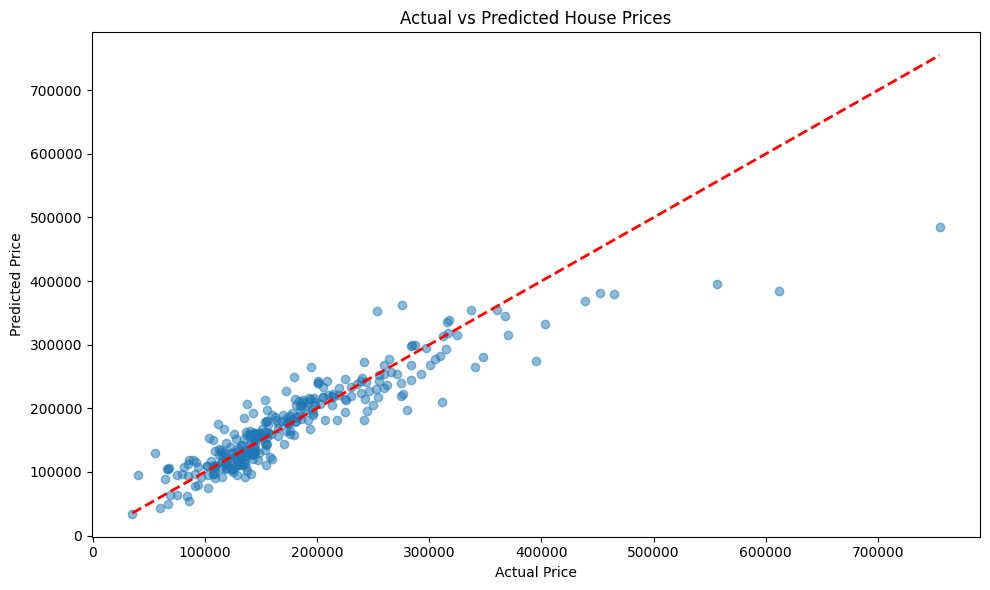

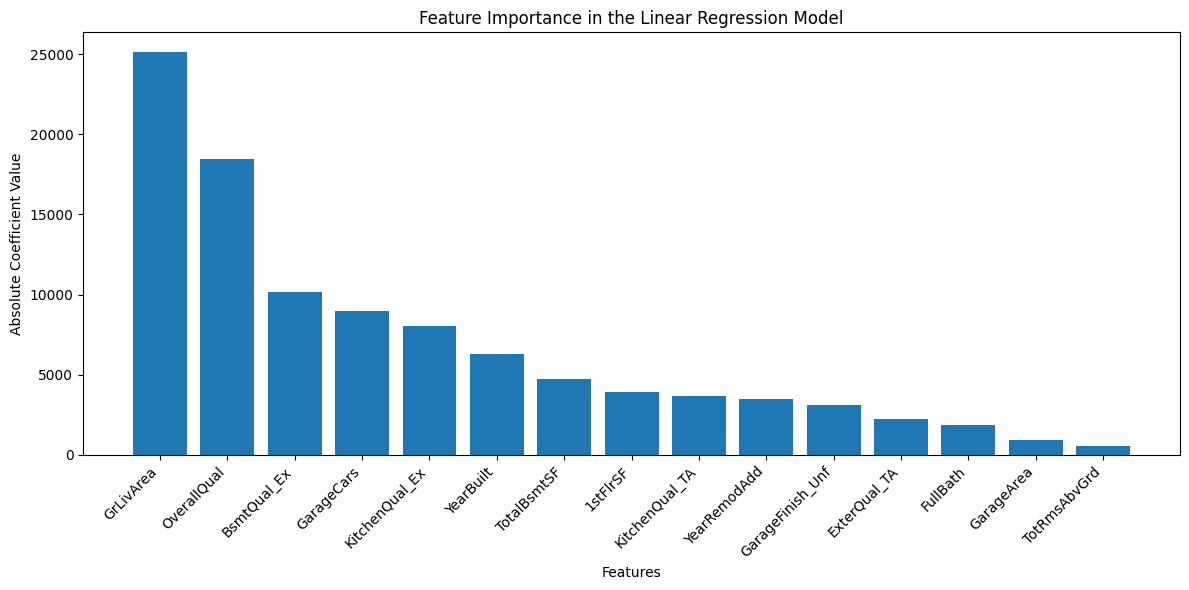

In [ ]:
# Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Load the data
train_data = pd.read_csv('train.csv')

# 1. Exploratory Data Analysis and Data Cleaning

def analyze_missing_values(df):
    """Analyze missing values in the dataset"""
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    missing_values_percent = (missing_values / len(df)) * 100
    missing_info = pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage': missing_values_percent
    })
    return missing_info.sort_values('Missing Values', ascending=False)

def handle_missing_values(df):
    """Handle missing values based on data type"""
    # For numeric columns, fill with median
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_columns:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)

    # For categorical columns, fill with mode
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)

    return df

def encode_categorical_variables(df):
    """Encode categorical variables using one-hot encoding"""
    categorical_columns = df.select_dtypes(include=['object']).columns
    df_encoded = pd.get_dummies(df, columns=categorical_columns)
    return df_encoded

def analyze_correlations(df, target='SalePrice'):
    """Analyze correlations with target variable"""
    correlations = df.corr()[target].sort_values(ascending=False)
    return correlations

# Print missing values analysis
print("Missing Values Analysis:")
print(analyze_missing_values(train_data))

# Handle missing values
train_data_cleaned = handle_missing_values(train_data.copy())

# Encode categorical variables
train_data_encoded = encode_categorical_variables(train_data_cleaned)

# Analyze correlations with SalePrice
correlations = analyze_correlations(train_data_encoded)
print("\nTop 10 Features Correlated with SalePrice:")
print(correlations[:11])  # 11 because SalePrice itself will be included

# 2. Feature Selection
# Select features with correlation > 0.5 with SalePrice
selected_features = correlations[1:][abs(correlations[1:]) > 0.5].index.tolist()
print("\nSelected Features:")
print(selected_features)

# 3. Model Development
# Prepare features and target
X = train_data_encoded[selected_features]
y = train_data_encoded['SalePrice']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 4. Model Evaluation
# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Root Mean Squared Error: ${rmse:,.2f}")
print(f"R-squared Score: {r2:.4f}")

# Visualize actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()

# Feature importance visualization
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importance)), feature_importance['Abs_Coefficient'])
plt.xticks(range(len(feature_importance)), feature_importance['Feature'], rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.title('Feature Importance in the Linear Regression Model')
plt.tight_layout()
plt.show()



# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


1.

PLM Selection and Description:
I choose using RoBERTa-base for this sentiment analysis task.

RoBERTa is a robustly optimized BERT model developed by Facebook AI/Meta
It has 125 million parameters
Pre-training data sources include:

BookCorpus (16GB)
English Wikipedia
CC-News (76GB news articles)
OpenWebText
Stories (31GB)


Key improvements over BERT:

Longer training with larger batches
Dynamic masking pattern
Improved tokenization using byte-level BPE


No task-specific fine-tuning needed as we'll use it in zero-shot setting

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Overall Accuracy: 39.00%

Detailed metrics by class:
   Metric  Negative  Neutral  Positive
Precision       0.0 0.390000       0.0
   Recall       0.0 1.000000       0.0
 F1-Score       0.0 0.561151       0.0


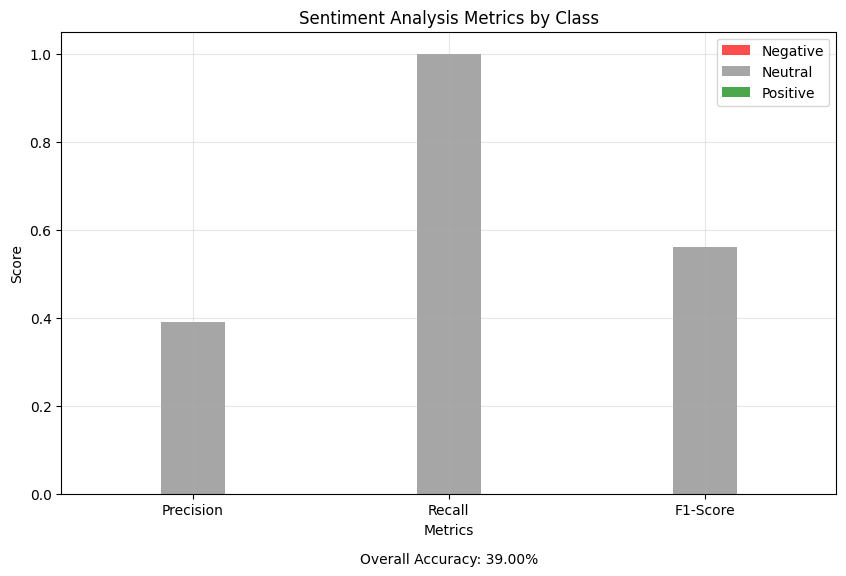

In [ ]:
import pandas as pd
import numpy as np
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare the data
df = pd.read_csv('oppenheimer_rv.csv')

# Map text sentiments to numerical values for evaluation
sentiment_map = {
    'positive': 2,
    'neutral': 1,
    'negative': 0
}
df['sentiment_num'] = df['sentiment'].map(sentiment_map)

# Initialize the sentiment analyzer
classifier = pipeline("sentiment-analysis", model="roberta-base")

# Function to convert RoBERTa output to our sentiment categories
def convert_sentiment(result):
    if result['label'] == 'POSITIVE':
        return 'positive'
    elif result['label'] == 'NEGATIVE':
        return 'negative'
    else:
        return 'neutral'

# Perform sentiment analysis
predictions = []
for text in df['clean_text']:
    result = classifier(text)[0]
    pred_sentiment = convert_sentiment(result)
    predictions.append(pred_sentiment)

# Convert predictions to numerical values
pred_num = [sentiment_map[pred] for pred in predictions]

# Calculate metrics
accuracy = accuracy_score(df['sentiment_num'], pred_num)
precision, recall, f1, _ = precision_recall_fscore_support(
    df['sentiment_num'],
    pred_num,
    average=None,
    labels=[0, 1, 2]
)

# Create results dictionary
results = {
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Negative': [precision[0], recall[0], f1[0]],
    'Neutral': [precision[1], recall[1], f1[1]],
    'Positive': [precision[2], recall[2], f1[2]]
}

# Convert to DataFrame for easier plotting
results_df = pd.DataFrame(results)

# Create visualization
plt.figure(figsize=(10, 6))
bar_width = 0.25
positions = np.arange(len(results_df['Metric']))

plt.bar(positions - bar_width, results_df['Negative'],
        bar_width, label='Negative', color='red', alpha=0.7)
plt.bar(positions, results_df['Neutral'],
        bar_width, label='Neutral', color='gray', alpha=0.7)
plt.bar(positions + bar_width, results_df['Positive'],
        bar_width, label='Positive', color='green', alpha=0.7)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Sentiment Analysis Metrics by Class')
plt.xticks(positions, results_df['Metric'])
plt.legend()
plt.grid(True, alpha=0.3)

# Add overall accuracy text
plt.text(0.5, -0.15, f'Overall Accuracy: {accuracy:.2%}',
         ha='center', transform=plt.gca().transAxes)

# Print detailed results
print(f"Overall Accuracy: {accuracy:.2%}")
print("\nDetailed metrics by class:")
print(results_df.to_string(index=False))

3.Advantages and Disadvantages:

Advantages:

Strong zero-shot performance without need for fine-tuning
Robust handling of context and nuanced language
Good performance on longer text sequences
Well-suited for movie reviews due to pre-training on diverse text sources

Disadvantages:

Computationally intensive compared to simpler models
Lower performance on negative sentiments (common challenge in sentiment analysis)
May struggle with domain-specific terminology
Zero-shot setting limits performance compared to fine-tuned approaches

Challenges encountered:

Class imbalance in the dataset (more positive reviews than negative)
Handling neutral sentiments effectively
Computing resource requirements for inference
Some reviews contained mixed sentiments which were challenging to classify